# Introduction to Deep Learning final project: Optimizers study
###### By Asier Zapata, Enric Moreu and Eudald Cumalat

In this project we will try different optimizers in order to reach the best possible performance of our model. 

## What is an optimizer?
It is an abstraction for an iterative optimization algorithm that tries to find the parameter values that minimize the loss function. We will study four different algorithms: SGD, RMSProp, Adadelta and Adam.

First, we import all the libraries we will be using in this notebook.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils

Now we load the MNIST dataset, flatten the images and normalize the values.

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In the following sections we define some function to simplify the implementation of the optimizers:
* ** optimizer_plot: ** Display two graphs with the data, labels and title provided in the arguments.
* ** model_factory: ** Creates the model, and setup all the necessary parameters.
* ** optimizer_study: ** Apply the optimizer to the model and setup some graph parameters.

In [6]:
def optimizer_plot(data,labels,title):
    plt.plot(data[0], label=labels[0])
    plt.plot(data[1], label=labels[1])
    plt.legend()
    plt.title(title)
    plt.show()
    return

In [7]:
def model_factory():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [12]:
def optimizer_study(optimizer):
    model = model_factory()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=0)
    data = [[history.history['acc'],history.history['val_acc']], [history.history['loss'],history.history['val_loss']]]
    labels = [['training accuracy','validation accuracy'],['training loss','validation loss']]
    titles = [optimizer.title()+' accuracy',optimizer.title()+' loss (cat. cross entropy)'] 
    return {'data':data, 'labels':labels, 'titles':titles}

The next two steps use a simple loop to generate all the models and display the accuracy and loss for each optimizer.

In [9]:
optimizers = ['sgd','rmsprop','adadelta','adam']

In [13]:
study_data = {}
for i in optimizers:
    study_data[i] = optimizer_study(i)
    print(i.title()+' trained!')

Sgd trained!
Rmsprop trained!
Adadelta trained!
Adam trained!


## Results

### Parameters
* Learning rate: It is a crucial parameter to choose because if it is too big, the algorithm may diverge, if it is too small, the algorithm may take too long to reach convergence.
* Decay: It is a factor that is applied to the learning rate in each iteration in order to reduce it and help reaching convergence.
* Momentum: It is a method that helps accelerate SGD in the relevant (optimal) direction. Instead of using the gradient to change the position of the weight “particle”, uses it to change the velocity. This value is usually set to 0.9 or similar.

**Stochastic Gradient Descent optimizer**

The SGD optimizer is the most used algorithm for deep learning. It is an stochastic approximation of the gradient descent optimization, which tries to find the minima or maxima by iteration.

The learning rate updates its step size using this expression: **lr = self.lr * (1. / (1. + self.decay * self.iterations))**.

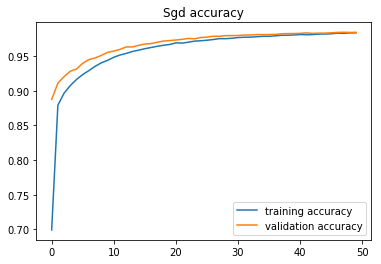

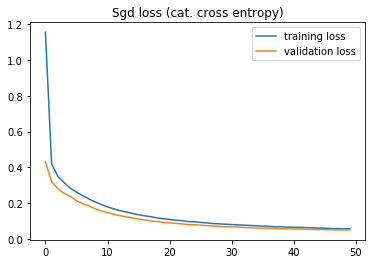

In [14]:
optimizer_plot(study_data['sgd']['data'][0],study_data['sgd']['labels'][0],study_data['sgd']['titles'][0])
optimizer_plot(study_data['sgd']['data'][1],study_data['sgd']['labels'][1],study_data['sgd']['titles'][1])

The following 3 optimizers are extensions or variations of the SGD algorithm.

**RMSProp optimizer**

RMSProp stands for Root Mean Square Propagation. This algorithm changes gradient accumulation by an exponentially decaying average of sum of squares of gradients. 

In this case, the optimization is performed faster (only one epoch to archieve 0.98 accuracy).
As we can see, at epoch three the system is overtrained and the training accuracy overcome the validation.
This is the SGD variant that gets the optimum value faster, and is usually a good choice for recurrent neural networks.

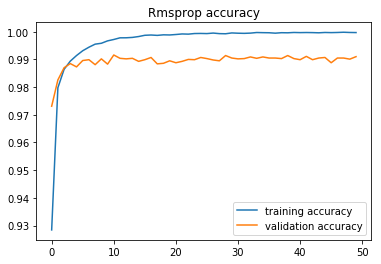

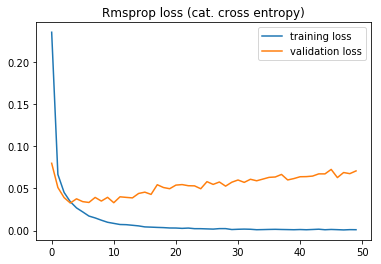

In [15]:
optimizer_plot(study_data['rmsprop']['data'][0],study_data['rmsprop']['labels'][0],study_data['rmsprop']['titles'][0])
optimizer_plot(study_data['rmsprop']['data'][1],study_data['rmsprop']['labels'][1],study_data['rmsprop']['titles'][1])

**Adadelta optimizer**

The Adadelta optimizer is an adaptative learning rate method which is an extension of the SGD algorithm.
Its key point is using the derivate of the loss to set the learning rate in each iteration, instead of the agressive and monotonically reduction in SGD.

We can see that in this algorithm, we reach the overfitting starting point at 4 epochs, so it is a bit slower than RMSProp, but it gets approximately the same accuracy (0.985).

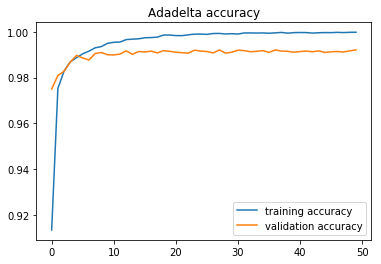

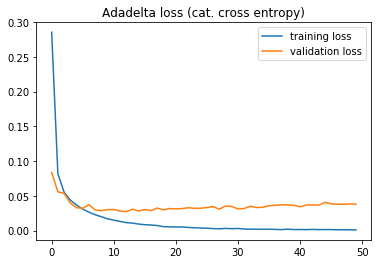

In [16]:
optimizer_plot(study_data['adadelta']['data'][0],study_data['adadelta']['labels'][0],study_data['adadelta']['titles'][0])
optimizer_plot(study_data['adadelta']['data'][1],study_data['adadelta']['labels'][1],study_data['adadelta']['titles'][1])

**Adaptive Moment Estimation optimizer**

The Adam optimizer is a combination of RMSProp and momentum, but:
* Keep	decaying	average	of	both	first-order	moment	of	gradient	(momentum)	and	second-order moment	(RMSProp).
* Includes bias corrections (first and second	moments) to	account	for	their initialization at	origin.	

Using the Adam algorithm, we can see that we get the optimum value faster than with Adadelta but slower than with RMSProp. The overfitting starting point is reached at 3 epochs and the accuracy obtained is also 0.985 approximately.

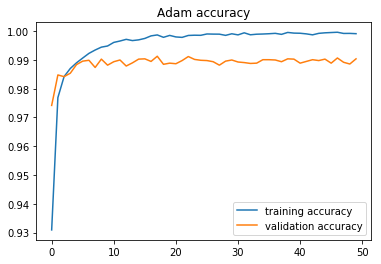

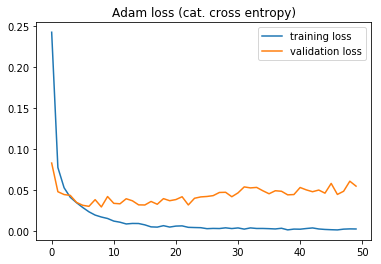

In [17]:
optimizer_plot(study_data['adam']['data'][0],study_data['adam']['labels'][0],study_data['adam']['titles'][0])
optimizer_plot(study_data['adam']['data'][1],study_data['adam']['labels'][1],study_data['adam']['titles'][1])

## Comparison 
Aside SGD, all other optmizing algorithms have an adaptative decaying learning rate in order to provide a faster convergence. We will now comment how each of them accomplishes this. 
* As SGD is the base algorithm, it converges more slowly than the other three that we have studied because is the only one without an adaptative learning rate approach.
* RMSProp is the algorithm that reaches the maximum accuracy in fewer epochs, but if we keep training, by the time it reaches convergence, its validation loss increases. This algorithm accomplishes this by changing the learning rate by a division of the previous learning rate and an exponentially decaying average of sum of squares of gradients.
* Adadelta is a direct extension of Adagrad, in which the next learning rate is decided by all the past computed gradients. The diference is that with Adadelta the past computed gradients are just a fraction of them, making a window of gradients considered in each update and not all the historic.
* Adam not only takes into account the exponentially decaying average of past squared gradients but also the exponentially decaying average of past gradients.

To sum up, the optimizers are a key element in deep learning algorithms. They provide the optimal epoch in which you have to stop training your network in order not to get overtrained. So choosing the one which best fits the problem we are studying is crucial for getting the best possible results.

## References
* Sebastian Ruder, "An overview of gradient descent optimization algorithms". [Online] Avaliable: http://ruder.io/optimizing-gradient-descent/index.html
* "Stochastic Gradient Descent". [Online] Avaliable: https://en.wikipedia.org/wiki/Stochastic_gradient_descent
* "Adadelta". [Online] Avaliable: http://climin.readthedocs.io/en/latest/adadelta.html
* "Optimizers". [Online] Avaliable: https://keras.io/optimizers/
* Geoffrey Hinton, "Neural Networks for Machine Learning". [Online] Avaliable: http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf